In [61]:
import pandas as pd 
import numpy as np
from pandas.plotting import scatter_matrix
%matplotlib inline

In [113]:
df=pd.read_csv("ETG_Learning.csv") 


In [63]:
df

,date,RealP2,RealP3,RealP1,RealP_tot,DIFF,EVENT,Vrms1,ETG,index,Vrms2,Irms2,Irms3,Irms1,PowerF2,PowerF3,Vrms3,PowerF1,day,hour
0,30/07/2021 00:00,14.9,0.3,140.9,NaN,NaN,NaN,258.2,1,57697,256.9,241.4,278.7,647.6,0.241,0.658,1.5,0.843,30/07/2021,0
1,30/07/2021 00:00,11.2,0.3,135.1,NaN,NaN,NaN,258.3,1,57698,256.9,235.8,279.4,628.8,0.185,0.640,1.5,0.832,30/07/2021,0
2,30/07/2021 00:00,11.2,0.3,134.8,NaN,NaN,NaN,258.2,1,57699,257.0,236.5,272.5,625.1,0.184,0.619,1.5,0.835,30/07/2021,0
3,30/07/2021 00:00,14.6,0.3,135.3,NaN,NaN,NaN,258.4,1,57700,257.0,243.1,275.8,626.6,0.234,0.608,1.6,0.836,30/07/2021,0
4,30/07/2021 00:00,13.9,0.3,131.2,NaN,NaN,NaN,258.2,1,57701,256.7,239.6,275.0,610.9,0.227,0.702,1.4,0.832,30/07/2021,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16581,30/07/2021 23:59,14.9,0.3,173.3,NaN,NaN,NaN,254.3,1,74278,252.6,246.1,304.3,767.3,0.240,0.605,1.6,0.888,30/07/2021,23
16582,30/07/2021 23:59,10.1,0.3,132.6,NaN,NaN,NaN,254.1,1,74279,252.7,239.2,314.6,631.4,0.167,0.543,1.7,0.827,30/07/2021,23
16583,30/07/2021 23:59,14.1,0.3,164.9,NaN,NaN,NaN,254.3,1,74280,252.7,235.7,308.1,739.2,0.236,0.560,1.5,0.877,30/07/2021,23
16584,30/07/2021 23:59,11.8,0.3,144.1,NaN,NaN,NaN,254.1,1,74281,252.8,240.7,313.4,666.6,0.194,0.649,1.4,0.851,30/07/2021,23


In [64]:
#Data discovery
print ("DATA SHAPES : ",df.shape)
df.info()

DATA SHAPES :  (16586, 20)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16586 entries, 0 to 16585
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       16586 non-null  object 
 1   RealP2     16586 non-null  float64
 2   RealP3     16586 non-null  float64
 3   RealP1     16586 non-null  float64
 4   RealP_tot  1382 non-null   float64
 5   DIFF       1381 non-null   float64
 6   EVENT      24 non-null     object 
 7   Vrms1      16586 non-null  float64
 8   ETG        16586 non-null  int64  
 9   index      16586 non-null  int64  
 10  Vrms2      16586 non-null  float64
 11  Irms2      16586 non-null  float64
 12  Irms3      16586 non-null  float64
 13  Irms1      16586 non-null  float64
 14  PowerF2    16586 non-null  float64
 15  PowerF3    16586 non-null  float64
 16  Vrms3      16586 non-null  float64
 17  PowerF1    16586 non-null  float64
 18  day        16586 non-null  object 
 19  hour       16586 no

In [65]:
df.isnull().sum()

date             0
RealP2           0
RealP3           0
RealP1           0
RealP_tot    15204
DIFF         15205
EVENT        16562
Vrms1            0
ETG              0
index            0
Vrms2            0
Irms2            0
Irms3            0
Irms1            0
PowerF2          0
PowerF3          0
Vrms3            0
PowerF1          0
day              0
hour             0
dtype: int64

In [66]:
def uni_col_val(df):
    for column in df:
        if df[column].dtype == 'object':
            print(f'{column} : {df[column].unique()}')

In [67]:
uni_col_val(df)

date : ['30/07/2021 00:00' '30/07/2021 00:01' '30/07/2021 00:02' ...
 '30/07/2021 23:57' '30/07/2021 23:58' '30/07/2021 23:59']
EVENT : [nan 'CLIM MONIA ON' 'CLIM IOT ON' 'CLIM IOT OFF' 'REFRIGIRATEUR ON'
 'MICRO ONDE ON' 'MICRO ONDE OFF' 'CLIM GRANDE SALLE ON'
 'CLIM GRANDE SALLE OFF' 'CLIM BUREAU KARIM ON' 'DATA SHOW OFF'
 'CLIM BUREAU KARIM OFF' 'MACHINE NESPRESSO ON' 'MACHINE NESPRESSO OFF'
 'CHAUFFE BAIN ON']
day : ['30/07/2021']


In [68]:
print(df['RealP_tot'].unique())

[   nan   72.    84.6 ... 2817.1 2812.5 2808.6]


In [69]:
print(df['ETG'].unique())

[1]


In [116]:
df['consommation']=df['RealP1']+df['RealP2']+df['RealP3']

In [71]:
df

,date,RealP2,RealP3,RealP1,RealP_tot,DIFF,EVENT,Vrms1,ETG,index,...,Irms2,Irms3,Irms1,PowerF2,PowerF3,Vrms3,PowerF1,day,hour,consommation
0,30/07/2021 00:00,14.9,0.3,140.9,NaN,NaN,NaN,258.2,1,57697,...,241.4,278.7,647.6,0.241,0.658,1.5,0.843,30/07/2021,0,156.1
1,30/07/2021 00:00,11.2,0.3,135.1,NaN,NaN,NaN,258.3,1,57698,...,235.8,279.4,628.8,0.185,0.640,1.5,0.832,30/07/2021,0,146.6
2,30/07/2021 00:00,11.2,0.3,134.8,NaN,NaN,NaN,258.2,1,57699,...,236.5,272.5,625.1,0.184,0.619,1.5,0.835,30/07/2021,0,146.3
3,30/07/2021 00:00,14.6,0.3,135.3,NaN,NaN,NaN,258.4,1,57700,...,243.1,275.8,626.6,0.234,0.608,1.6,0.836,30/07/2021,0,150.2
4,30/07/2021 00:00,13.9,0.3,131.2,NaN,NaN,NaN,258.2,1,57701,...,239.6,275.0,610.9,0.227,0.702,1.4,0.832,30/07/2021,0,145.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16581,30/07/2021 23:59,14.9,0.3,173.3,NaN,NaN,NaN,254.3,1,74278,...,246.1,304.3,767.3,0.240,0.605,1.6,0.888,30/07/2021,23,188.5
16582,30/07/2021 23:59,10.1,0.3,132.6,NaN,NaN,NaN,254.1,1,74279,...,239.2,314.6,631.4,0.167,0.543,1.7,0.827,30/07/2021,23,143.0
16583,30/07/2021 23:59,14.1,0.3,164.9,NaN,NaN,NaN,254.3,1,74280,...,235.7,308.1,739.2,0.236,0.560,1.5,0.877,30/07/2021,23,179.3
16584,30/07/2021 23:59,11.8,0.3,144.1,NaN,NaN,NaN,254.1,1,74281,...,240.7,313.4,666.6,0.194,0.649,1.4,0.851,30/07/2021,23,156.2


In [72]:
from matplotlib import pyplot

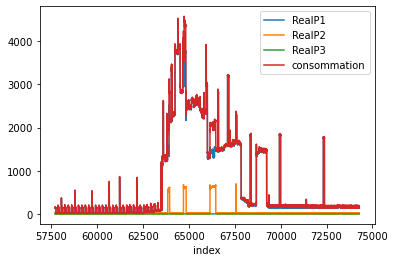

In [73]:
df.plot(x="index", y=["RealP1", "RealP2","RealP3","consommation"])       

In [81]:
import seaborn as sns
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [98]:
#standart scaling
df['consommation'] = (df['consommation'] - df['consommation'].min()) / (df['consommation'].max() - df['consommation'].min())
        

In [118]:
#model training
max_features=1.0
n_estimators=50
max_samples='auto'
contamination=float(0.2)
forest_model=IsolationForest(max_features = max_features, n_estimators=n_estimators, max_samples=max_samples, contamination=contamination)
forest_model.fit(df[['consommation']])

IsolationForest(contamination=0.2, n_estimators=50)

In [120]:
df['scores']=forest_model.decision_function(df[['consommation']])
df['anomaly_Value']=forest_model.predict(df[['consommation']])


In [101]:
df

,date,RealP2,RealP3,RealP1,RealP_tot,DIFF,EVENT,Vrms1,ETG,index,...,Irms1,PowerF2,PowerF3,Vrms3,PowerF1,day,hour,consommation,scores,anomaly_Value
0,30/07/2021 00:00,14.9,0.3,140.9,NaN,NaN,NaN,258.2,1,57697,...,647.6,0.241,0.658,1.5,0.843,30/07/2021,0,0.030840,0.141146,1
1,30/07/2021 00:00,11.2,0.3,135.1,NaN,NaN,NaN,258.3,1,57698,...,628.8,0.185,0.640,1.5,0.832,30/07/2021,0,0.028757,0.150078,1
2,30/07/2021 00:00,11.2,0.3,134.8,NaN,NaN,NaN,258.2,1,57699,...,625.1,0.184,0.619,1.5,0.835,30/07/2021,0,0.028692,0.148812,1
3,30/07/2021 00:00,14.6,0.3,135.3,NaN,NaN,NaN,258.4,1,57700,...,626.6,0.234,0.608,1.6,0.836,30/07/2021,0,0.029547,0.144671,1
4,30/07/2021 00:00,13.9,0.3,131.2,NaN,NaN,NaN,258.2,1,57701,...,610.9,0.227,0.702,1.4,0.832,30/07/2021,0,0.028494,0.141916,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16581,30/07/2021 23:59,14.9,0.3,173.3,NaN,NaN,NaN,254.3,1,74278,...,767.3,0.240,0.605,1.6,0.888,30/07/2021,23,0.037941,0.149704,1
16582,30/07/2021 23:59,10.1,0.3,132.6,NaN,NaN,NaN,254.1,1,74279,...,631.4,0.167,0.543,1.7,0.827,30/07/2021,23,0.027968,0.128767,1
16583,30/07/2021 23:59,14.1,0.3,164.9,NaN,NaN,NaN,254.3,1,74280,...,739.2,0.236,0.560,1.5,0.877,30/07/2021,23,0.035925,0.135032,1
16584,30/07/2021 23:59,11.8,0.3,144.1,NaN,NaN,NaN,254.1,1,74281,...,666.6,0.194,0.649,1.4,0.851,30/07/2021,23,0.030862,0.141146,1


In [102]:
print(df['anomaly_Value'].unique())

[ 1 -1]


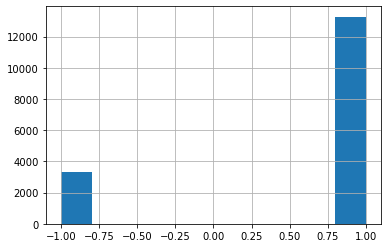

In [121]:
df['anomaly_Value'].hist()

In [112]:
df.to_csv(r'\Users\msi\stage sfm\pure_data.csv', index = False)

In [122]:
print(df[df['anomaly_Value']==-1])

                   date  RealP2  RealP3  RealP1  RealP_tot  DIFF EVENT  Vrms1  \
354    30/07/2021 00:30    11.7     0.3   360.8        NaN   NaN   NaN  255.9   
425    30/07/2021 00:36    13.7     0.3    40.8        NaN   NaN   NaN  256.2   
1095   30/07/2021 01:35    14.0     0.3   538.9        NaN   NaN   NaN  257.5   
2026   30/07/2021 02:55    11.5     0.3   525.1        NaN   NaN   NaN  256.0   
2096   30/07/2021 03:02    15.5     0.3    73.7        NaN   NaN   NaN  255.8   
...                 ...     ...     ...     ...        ...   ...   ...    ...   
14678  30/07/2021 21:14    13.5     0.3  1768.9        NaN   NaN   NaN  252.5   
14679  30/07/2021 21:14    10.2     0.3  1729.5        NaN   NaN   NaN  252.3   
14680  30/07/2021 21:14    14.6     0.3  1767.0        NaN   NaN   NaN  252.3   
14681  30/07/2021 21:14     9.9     0.3  1752.5        NaN   NaN   NaN  252.2   
14682  30/07/2021 21:14    13.8     0.2  1769.3        NaN   NaN   NaN  252.4   

       ETG  index  ...   Ir